![](fig/univ.png)


## Linear, Multi and Polynomial and kNN Regression 

**Namal University, Mianwali**<br/>
<hr style="height:2.4pt">

In [ ]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML

In [ ]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

In [ ]:
os.curdir

'.'

<hr style="height:2pt">

<h2> INSTRUCTIONS </h2>


- This is a jupyter notebook of your homework. Work on Google colab or download it and work on your local machine.

- Ensure you have submitted the homework.

- Please restart the kernel and run the entire notebook again before you submit. When you are sure to have no errors but still getting errors then also restart the kernel and run the code cell/notebook again.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. 

- To submit the lab work, either upload the working notebook on classroom or edit the default notebook assigned to you.

- Submit the lab work well before the given deadline. Submissions after the deadline will not be graded.

- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- Comment your code well. This would help me in case there is any issue with the notebook while running.  

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
<hr style="height:2pt">

<h2> Overview </h2> 

These lab tasks are the first where you will go through the process of loading a dataset, splitting it in train,validation and test sets, 
pre-processing it, and finally using it to run models and evaluating your results. 

We have two different datasets, one with car data in **Part 1** and another with data from an Indian matrimonial web site in **Part 2**.

For part 1, you will explore simple method for prediction **linear regression**,  a *parametric* method. As you move towards Part 2 of the homework, you will work with multiple linear and polynomial regression.

In [ ]:
!pip install seaborn

In [ ]:
# Importing standard libraries
import numpy as np
import operator
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression

# Pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# Part 2 imports 
from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Run this cell for more readable visuals 
large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-whitegrid')
plt.rcParams.update(params)
%matplotlib inline

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<h2 style="color:black;background-color:#F6E6E2"> kNN and Linear Regression </h2>    <br />


### Problem Description: Predicting the Selling Price of Cars on CarDekho.com

According to its website, **CarDekho.com** is India's leading car search venture. 
Its website and app carry rich automotive content such as expert reviews, 
detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. 
Each car has a **Current selling price**, which is the price for buying the car on this site, and a **MRP**, 
which is the retail price of the car. These two prices differ depending on factors such as brand, 
make year, mileage, condition, etc.  
    
#### DATASET

The dataset contains 601 cars and is in file `car_dekho_full.csv`. It contains the following columns:

- **Year** - make year (year the car was made), 
- **Current_Selling_Price** - current price of a car on CarDekho.com (in lakhs),
- **MRP** - maximum retail price of a car (in lakhs),
- **Kms_Driven** - number of kilometers

Note: 1 *lakh*  is 100,000 Rupees in the Indian numbering system. Also, kilometers are used as a measure of distance instead of miles.

#### Your Task: 
Predict the `Current_Selling_Price` from the other features.




<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<b> Question 1:   Exploratory Data Analysis (EDA)</b>

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

Load the dataset, inspect it and answer the following questions: 

**1.1** Which variables are quantitative, and which are categorical? 

**1.2** What are the means and standard deviations for `Current_Selling_Price` and `MRP`? 

**1.3** What is the range of Kilometers that the cars have?

**1.4** The goal of this part is to identify the best variable from which to predict our respone variable `Current Selling Price`. Plot a scatter plot between each predictor and reponse variable and examine the relationship between the predictors and `Current_Selling_Price`. Based on the plots, which is the  predictor that visually seems to best predict the `Current_Selling_Price`? 
    
**Note**: Label your axes.
</div>

## Solutions 

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/akmalatnamal/davlab7/main/car_dekho_full.csv")

In [ ]:
df.head(2)

,Year,Current_Selling_Price,MRP,Kms_Driven
0,2016,5.25,5.7,3493
1,2005,3.51,13.7,75000


### 1.1

**Which variables are quantitative, and which are categorical?**

#Answer:
- Find unique values of column. Then take diffrence with total data and divide it with total data. take its percentage, if it is greater than 90% so it is catagorical data.<br/>
Year is categorical.

In [ ]:
years = df.Year.unique()

In [ ]:
print(((601-16)/601)*100)

97.33777038269551


### 1.2

**What are the means and standard deviations for Current_Selling_Price and MRP?**

In [ ]:
# Name your variables as mean_csp, mean_mrp, std_csp, std_mrp
mean_csp = np.array(df.Current_Selling_Price).mean()
std_csp = np.array(df.Current_Selling_Price).std()

mean_mrp = np.array(df.MRP).mean()
std_mrp = np.array(df.MRP).std()
# end your code here 


print ("The mean Current Selling Price is", mean_csp,"lakhs")
print ("The mean MRP is", mean_mrp,'lakhs')
print ("The Standard Deviation of Current Selling Price is", std_csp)
print ("The Standard Deviation of MRP is", std_mrp)

The mean Current Selling Price is 4.393078202995008 lakhs
The mean MRP is 6.911552412645592 lakhs
The Standard Deviation of Current Selling Price is 4.514554426823631
The Standard Deviation of MRP is 6.474727596220264


### 1.3

**What is the range of Kilometers that the cars have?**

In [ ]:
# your code here
range = np.array(df.Kms_Driven).max()-np.array(df.Kms_Driven).min()
range

212500

### 1.4

**The goal of this part is to identify the best variable from which to predict our respone variable Current Selling Price. Plot a scatter plot between each predictor and reponse variable and examine the relationship between the predictors and Current_Selling_Price. Based on the plots, which is the predictor that visually seem to best predict the Current_Selling_Price?**

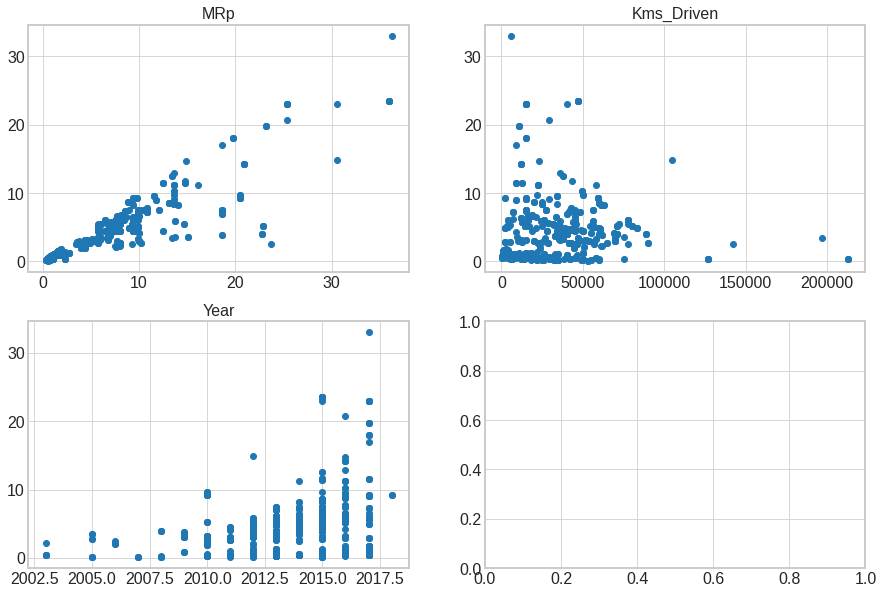

In [ ]:
from IPython.core.pylabtools import figsize
# your code here
figure,axis = plt.subplots(2,2,figsize=(15,10))

axis[0,0].scatter(x=df.MRP,y=df.Current_Selling_Price)
axis[0,0].set_title("MRp")

axis[0,1].scatter(x=df.Kms_Driven,y=df.Current_Selling_Price)
axis[0,1].set_title("Kms_Driven")

axis[1,0].scatter(x=df.Year,y=df.Current_Selling_Price)
axis[1,0].set_title("Year")
plt.show()


###***As above visualization make us to claim that relationship between MRP and Current_selling_price is more stronger than other Features.***
**So we will choce MRP**

---



---



<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<b> Question 2:   k-Nearest Neighbors  </b>
<br /><br />
We begin our modeling with k-Nearest Neighbors (kNN) regression. You may use `sklearn`'s built-in functions.
<br /><br />
**2.1** In this part, we will model a kNN regression on the predictor chosen above (1.4) and the response variable `Current_Selling_Price`.
<br /><br />
    
INSTRUCTIONS:
<br />
- Split the dataset in train and test set with 75% training data and 25% testing data, using the random_state = 109.  
<br />
- Fit a kNN regression model to the training set for the following 8 different values of $k$:  $k = 1,2,3,5,7,10,50,100$. 
<br />
- Make 8 scatter plots of response vs. predictor for each $k$, arranged in a $4\times2$ grid.  Each figure should have plots of the prediction from the k-NN regression and the actual data points on the same figure, as well as axis labels, title, and legend. Consider using the subplot functionality, unless you first try this and then decide that you have a clearer, cleaner way of communicating these plots.
<br />
- Evaluate the $MSE$ for the fitted models on both the training and test sets **for each $k$**.
<br />
- Plot the training and test $MSE$ values as a function of $k$ on the same figure.  Again, the figure must have axis labels and a legend.
<br />
- Find the best model based on the test $MSE$ values.
<br />
- Evaluate and report the $R^2$ of the best model.

<br /><br />
**2.2**  Discuss your results by answering the following questions.  You should answer the questions directly in a markdown cell of your notebook.
<br /><br />
- How does the value of $k$ affect the fitted model?
<br />
- If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
- Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.
<br />
- Run the same code by changing the random seed during the train-test split. Do you always get the same answer? If not, why?
<br />
    
    </div>

### Solutions

### 2.1
In this part, we will model a kNN regression on the predictor chosen above (1.4) and the response variable `Current_Selling_Price`.

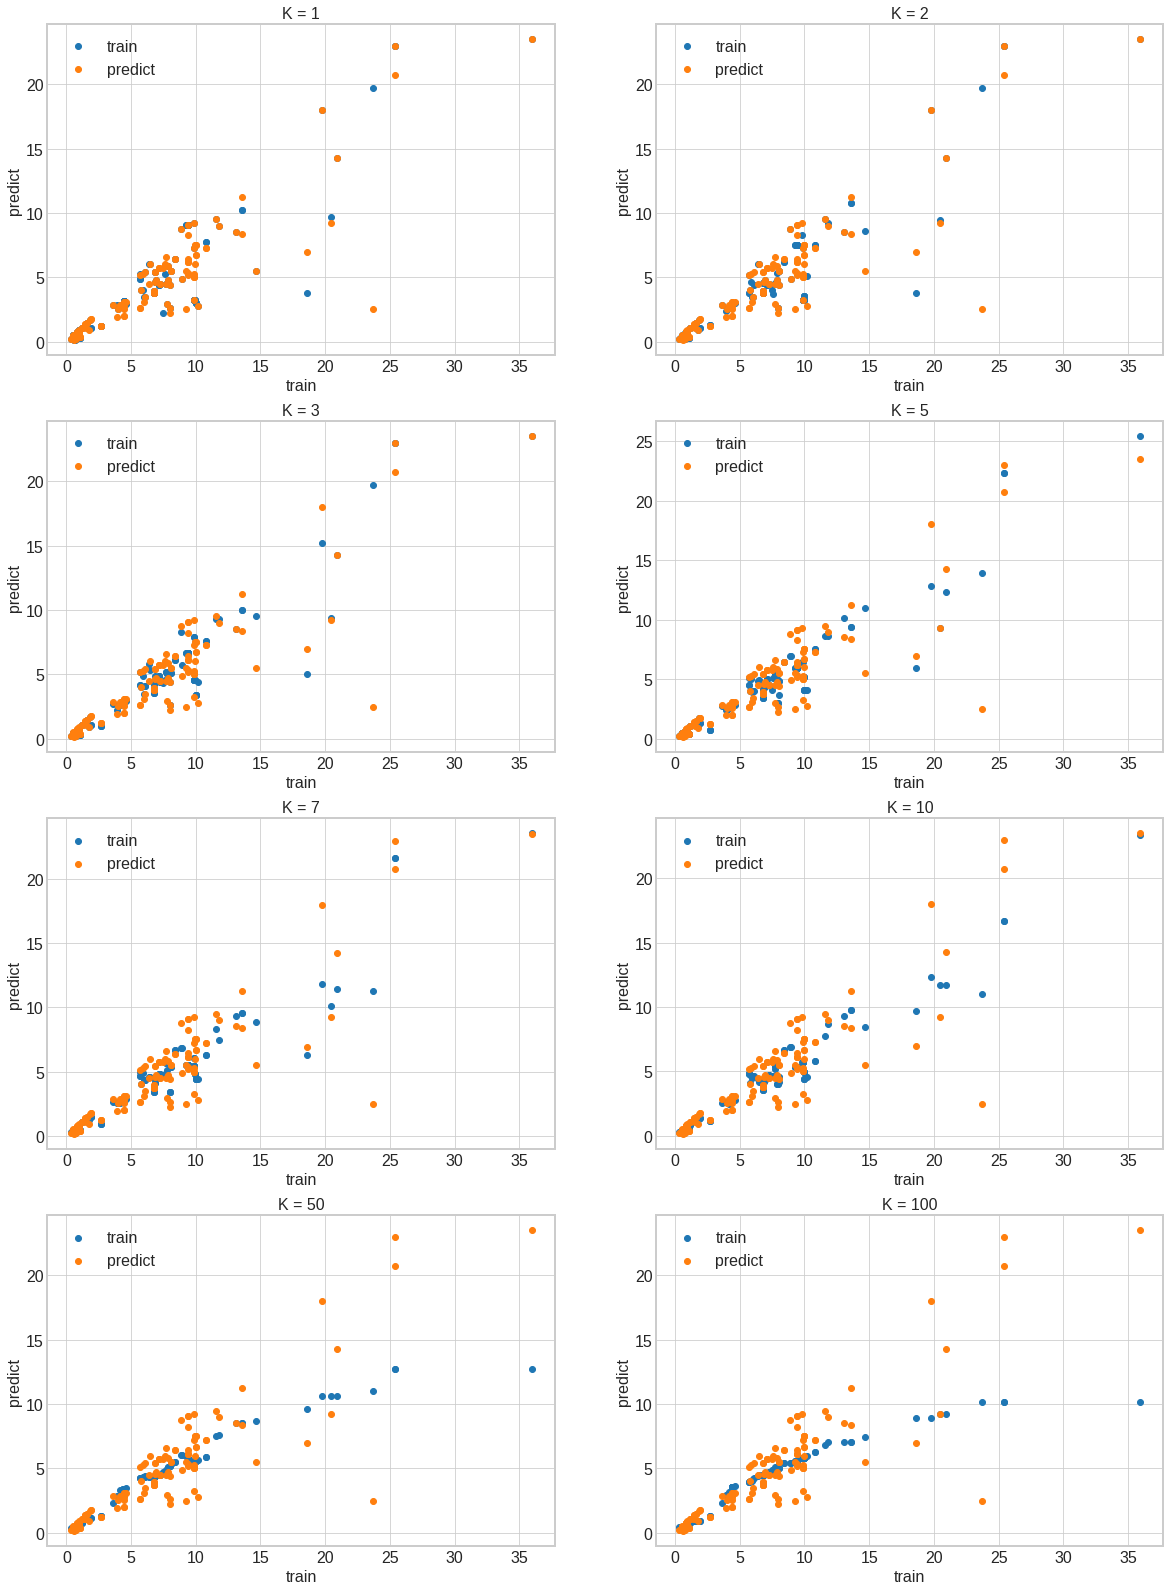

In [ ]:
from scipy.stats.morestats import yeojohnson_normplot
from sklearn import neighbors
#Choosing your predictor and response variable
# your code here
Y = df[["Current_Selling_Price"]]
X = df[["MRP"]]
# end of your code here 


##Splitting the data into train and test sets with 75% training data and 25% testing data. Set random_state=69
# your code here
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=109,test_size=0.25)
# end of your code here  


## Fit a kNN regression model to the training set for the following 8 different values of  𝑘 :  𝑘=1,2,3,5,7,10,50,100 .
from sklearn.neighbors import KNeighborsRegressor
k=[1,2,3,5,7,10,50,100]

y_predicts = []
for i in k:
  model = KNeighborsRegressor( n_neighbors =i)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  y_predicts.append(y_pred)

## and make 8 scatter plots of response vs. predictor for each  𝑘 , arranged in a  4×2  grid. 
figure,axis = plt.subplots(4,2,figsize=(20,28))
axis= axis.ravel()

i = 0
while i<8: 
  axis[i].scatter(x=x_test,y= y_predicts[i].ravel(),label="train")
  axis[i].set_title("K = "+str(k[i]))
  axis[i].scatter(x=x_test,y=y_test,label="predict")
  axis[i].legend(loc="upper left")
  axis[i].set_xlabel("train")
  axis[i].set_ylabel("predict")
  i +=1

## Each figure should have plots of the prediction from the k-NN regression and the actual data points on the same figure, as well as axis labels, title, and legend 
# your code here 
# Plotting



[4.005214569536424, 3.4917740066225167, 3.2267157468727006, 2.317284052980132, 2.0048362075956208, 2.481463463576159, 4.114911605033113, 5.466728661125828]
[1.7730839999999999, 1.4096247777777777, 1.36231624691358, 2.055763493333333, 2.6237648480725624, 3.7572193688888897, 6.421511601511111, 8.278461953777777]


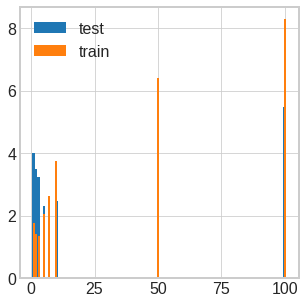

In [ ]:
# Now make the MSE plots
# your code here
MSE_test = []
i=0
while i<8:
  MSE_test.append(mean_squared_error(y_test,y_predicts[i].ravel()))
  i +=1
MSE_train = []
train_predicts = []
for i in k:
  model = KNeighborsRegressor( n_neighbors =i)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_train)
  train_predicts.append(y_pred)
print(MSE_test)

i=0
while i<8:
  MSE_train.append(mean_squared_error(y_train,train_predicts[i].ravel()))
  i +=1
print(MSE_train)
plt.figure(figsize=(5,5))
plt.bar(k,MSE_test,width=1,label="test")
plt.bar(k,MSE_train,label="train")
plt.legend()

In [ ]:
# Find the best model
# your code here
min =np.array(MSE_test).min()
best_K=k[MSE_test.index(min)]
print(f"best k == {best_K}")

best k == 7


In [ ]:
##Compute the R-squared for the best model
# your code here
r2_score(y_test,y_predicts[MSE_test.index(min)].ravel())

0.8755262998596883

### 2.2

**Your answer here**

**a) How does the value of $k$ affect the fitted model?**
<br />
####ANS:
diferent number of Ks affect differently. for example in ouer case k=7 is the best. if k is very small it covers noise and if it is very high , computation is costly.
<br />


**b) If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$? **
<br />
####ANS:
if k==n so , it make its computation very costly. because n>> while k b/w 5_10 is optimal for our model
<br>

**c) Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.**
<br />
####ANS:
The training bars remain same on same values of k after some values of k it is increasing with the increase in the number of K.<br/>test bars has different trends in the start they are higher and with increase in the number of k the bars decrease but after some nicrease then it starts increasing mean mse increases with the increase in the k neighbours.
<br>

**d) Run the same code by changing the random seed during the train-test split. Do you always get the same answer? If not, why?**
####ANS:

Not answer is changed every time,because training set choosed eery tim is diffrent from last.
<br>


<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<b> Question 3:  Simple Linear Regression   </b>
<br /><br />
**3.1** We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables used to model kNN regression.
<br /><br />
- You will use the same 75% training and 25% testing split of the data, using the same random_state = 109. 
<br />
- Run a Linear Regression model.
<br />
- Report the slope/coefficient and intercept values for the fitted linear model.
<br />
- Report the $MSE$ for the training and test sets and the $R^2$ from the test set.
<br />
- Plot the **residuals** $e = y - \hat{y}$ of the model on the training set as a function of the response variable. Draw a horizontal line denoting the zero residual value on the Y-axis. Discuss the shape of the plot and what it shows for the quality of the model.
<br /><br />
**Note:** Use the `sklearn` module for linear regression. This module has built-in functions to summarize the results of regression and produce residual plots. Create a `Linear Regression` model, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. As previously, you may use the `mean_squared_error` function to compute $MSE$.
<br /><br />
**3.2** Discuss your results by answering the following questions.  
<br />
- How does the test $MSE$ score compare with the best test $MSE$ value obtained with k-NN regression? 
<br />
- What does the sign of the slope of the fitted linear model convey about the data? 
<br />
- Based on the residual plot that you made, discuss whether or not the assumption of linearity is valid for this data.
<br /><br />
    </div>


### Solutions

### 3
**Predict the selling price**

### 3.1
**Predict the selling price **

In [ ]:
# your code here
linearModel = LinearRegression()

MSE_train =  13.506551764267055
MSE_test =  3.136167052174168
R2 eror =  0.8052856808135865


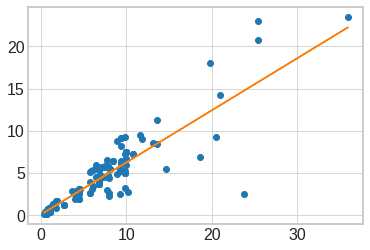

In [ ]:

## Fit a linear model to the train data

# your code here
linearModel.fit(x_train,y_train)
y_pred = linearModel.predict(x_test)
test_MSE = mean_squared_error(y_test,y_pred)

train_ = linearModel.predict(x_train)
MSE_train = mean_squared_error(x_train,train_)
e=y_train-train_
R2 = r2_score(y_test,y_pred)
print("MSE_train = ",MSE_train)
print("MSE_test = ",test_MSE)

print("R2 eror = ",R2)
# end of your code here 

## Plot the **residuals** 
# your code here 
plt.plot(x_test , y_test,'o', label= 'Actual')
plt.plot(x_test , y_pred , label= 'Predicted')

Text(0, 0.5, '_e_')

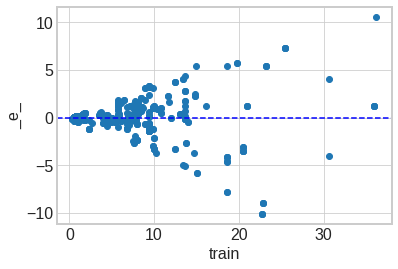

In [ ]:
## Plot the **residuals**
plt.plot(x_train , e,'o', )
plt.axhline(y=0, color='b', linestyle='--')
plt.xlabel("train")
plt.ylabel("_e_")

### 3.2

**Your answer here**

**a) How does the test $MSE$ score compare with the best test $MSE$ value obtained with k-NN regression?**
<br />
####ANS:
Lower value of MSE is the best value.for K=7 in KNN model is the best model.
<br />

**b) What does the sign of the slope of the fitted linear model convey about the data?  **
<br />
####ANS:
the sign of slope is positive, showing that relation b/w reponse and predictor is positive. if one increase or decrease other will behave likely.
<br />


**c) Based on the residual plot that you made, discuss whether or not the assumption of linearity is valid for this data.
<br />**
####ANS:
yes there, exist linearlity exist, as in plot it is dense at start but get weaker as it proceed to left.

<br />

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2"><b> Question 4:  Linear Regression with Feature engineering</b>
<br /><br />

**4.1** Creating a new variable from existing data: percentage depreciation
<br />
Feature engineering involves transforming data into features that better represent the underlying problem to the predictive models. This results in improved model accuracy on unseen data. 
<br />
Our previous regression model relates the Current selling price to the MRP of the car with the equation:
<br /><br />
$$CSP = \beta_0 + \beta_1*MRP$$
<br />
However, this linear equation does not incorparate other interesting variables such as the ```year of manufacture```, or the ```kms driven```, which maybe important factors that affect the overall price of the car. 
<br />
Instead of using multi-linear analysis, we can perform some intelligent feature engineering to identify other simple linear relationships within our data.
<br />
From practical experience, we know that the percentage drop of a car's price is proportional to the age of the car ([more on car depreciation here](https://www.finder.com/what-is-car-depreciation)). 
<br />
Hence, it makes sense to investigate this variable seperately and try to identify possible relationships with other variables.  
<br />
Define the percentage depreciation of the Current selling price to the MRP as follows:
<br /><br />
$$\textrm{Percentage of the Selling Price}=perc =\frac{MRP - Selling Price}{MRP}$$
    
<br /><br />
**4.2** Exploratory Data Analysis
<br /><br />
For this section, we will consider `perc` to be our intermediate response variable. To understand the relationship between `perc` and our predictor variables we will perform EDA.
<br /><br />
Answer the following questions by plotting graphs.
<br /><br />
a) It is seen previously that there is a relationship between `Year` and `Current Selling Price`. Is the relationship between `Year` and `perc` the same. If not, how has it changed and why do you think so?
<br />
b) Is the trend between the `MRP` and `perc` the same as that between `MRP` and `Current Selling Price`?
<br />
c) Does there seem to be a relationship between `Kms_Driven` and `perc` ? 
<br />
d) Which is the best predictor to predict `perc`, if there is one? Is it the same as that of `Current Selling price` or has it changed?
<br /><br />
**4.3** Perform additional EDA 
<br /><br />
Feel free to use other plots and statistics to find the best predictor and/or understand the relationship between variables. One example is given below. It is a plot of `Current Selling Price` vs `Year` that is color coded based on the `Kms_Driven`.
<br /><br />
**4.4** Fitting a Linear Regression model
<br /><br />
Based on the previous EDA choose appropriate **feature** variable(s) and **response** variable.
<br /><br />
- Again, split the data into training data of 75% and testing data of 25%.
<br />
- Fit a Linear Regression model for each of the predictors.
<br />
- Predict the model for the train and test data.
<br />
- Plot a graph with the test data with predictor variable on the *x* axis and `perc` on the *y* axis. Also plot the fit curve. Ensure you use the correct labels and show the legend.
<br />
- Report the $MSE$ score from the training and test sets.
<br />
- Find the best model i.e. the best predictor based on the $MSE$ of each model.
<br /><br />

**4.5** Predicting The Current Selling Price using ```perc``` 
<br /><br />
After performing the above analysis, answer briefly as to why are we getting such a dramatic increase in the R2 score?
    <br /><br />
 </div>

## Solutions

### 4.1

In [ ]:
#Create a new column perc and add to the dataframe
# your code here
perc = (df.MRP-df.Current_Selling_Price)/df.MRP
df["perc"] = perc
df.head(2)
#Creating a new column perc


,Year,Current_Selling_Price,MRP,Kms_Driven,perc
0,2016,5.25,5.7,3493,0.079
1,2005,3.51,13.7,75000,0.744


In [ ]:
(df.MRP[0]-df.Current_Selling_Price[0])/df.MRP[0]

0.07894736842105265

### 4.2

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


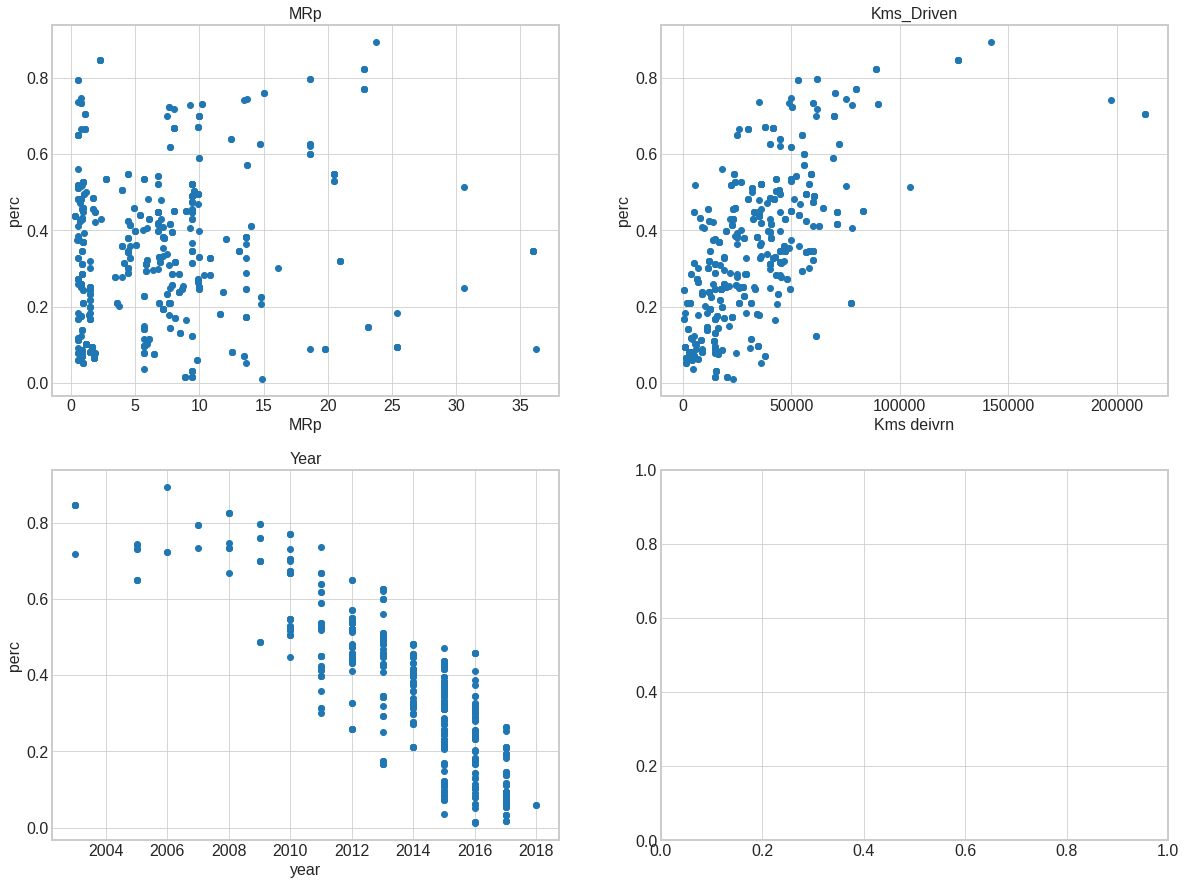

In [ ]:
from IPython.core.pylabtools import figsize
# your code here
figure,axis = plt.subplots(2,2,figsize=(20,15
                                        ))

# axis[0,0].scatter(x=df.MRP,y=df.Current_Selling_Price,label = "Current_Sp")
axis[0,0].scatter(x=df.MRP,y=df.perc)
axis[0,0].set_title("MRp")
axis[0,0].set_xlabel("MRp")
axis[0,0].set_ylabel("perc")
axis[0,0].legend()


# axis[0,1].scatter(x=df.Kms_Driven,y=df.Current_Selling_Price,label = "Current_Sp")
axis[0,1].scatter(x=df.Kms_Driven,y=df.perc)
axis[0,1].set_title("Kms_Driven")
axis[0,1].set_xlabel("Kms deivrn")
axis[0,1].set_ylabel("perc")
axis[0,1].legend()


# axis[1,0].scatter(x=df.Year,y=df.Current_Selling_Price,label = "Current_Sp")
axis[1,0].scatter(x=df.Year,y=df.perc)
axis[1,0].set_title("Year")
axis[1,0].set_xlabel("year")
axis[1,0].set_ylabel("perc")
axis[1,0].legend()

plt.show()



**Your answer here**


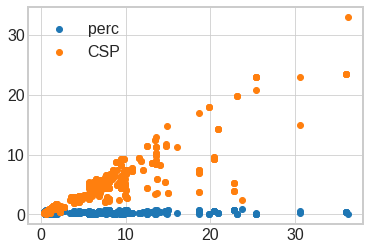

In [ ]:
# your code here
plt.scatter(x=df.MRP ,y=df.perc,label="perc")
plt.scatter(x=df.MRP,y=df.Current_Selling_Price,label="CSP")
plt.legend()

**Your answer here**<br>
No it is not same as MRP and Current selling price. 

No handles with labels found to put in legend.


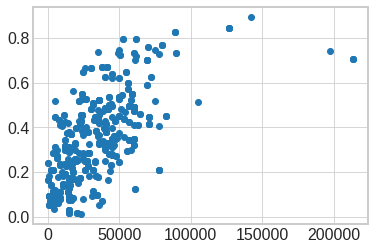

In [ ]:
# your code here
plt.scatter(x=df.Kms_Driven ,y=df.perc)
# plt.scatter(x=df.MRP,y=df.Current_Selling_Price,label="CSP")
plt.legend()

**Your answer here**<br>
Yes there is relation b/w Kms_Driven and Perc. it is positive relationship, kms_driven increase so perc is also increase.

d:<br>
KMS_driven is best predictor for perc and it is not same as with current_selling_price.

### 4.3

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


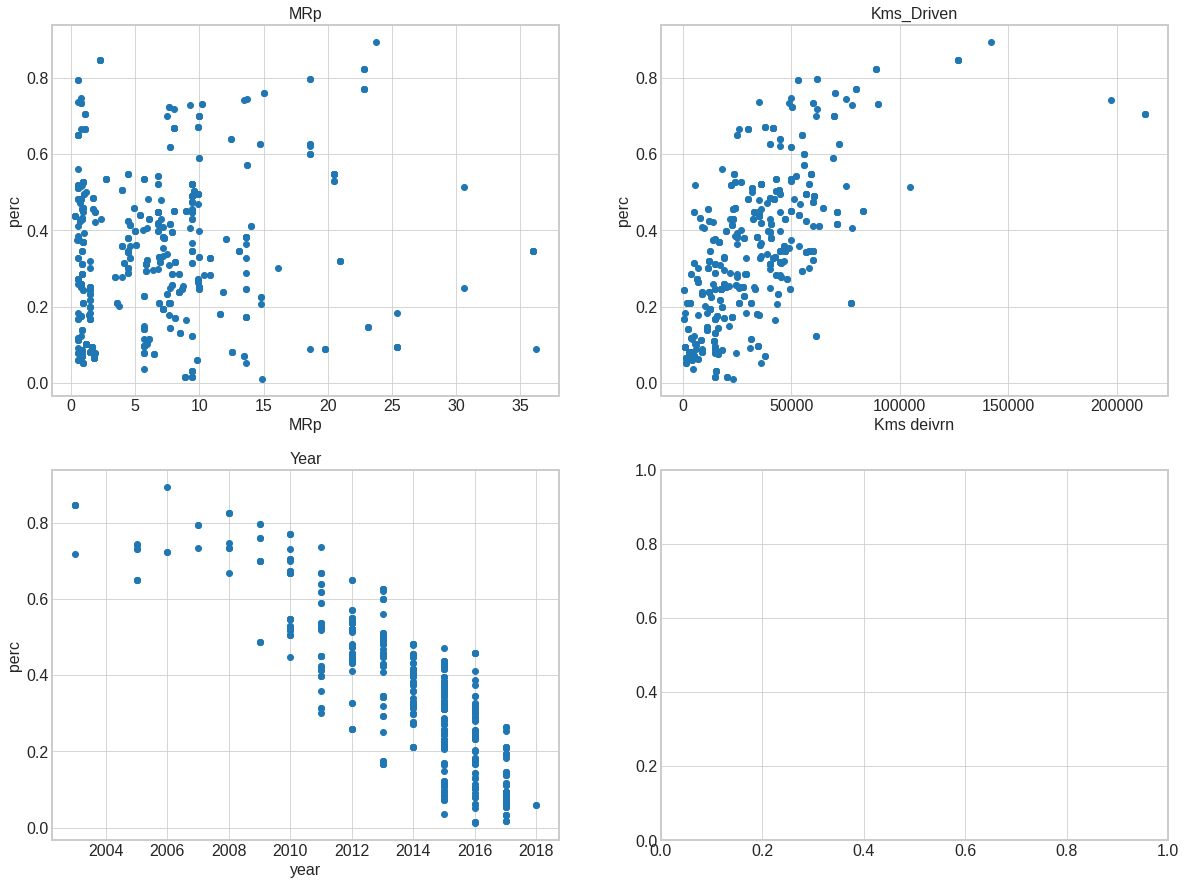

In [ ]:
#your code here
from IPython.core.pylabtools import figsize
# your code here
figure,axis = plt.subplots(2,2,figsize=(20,15
                                        ))

# axis[0,0].scatter(x=df.MRP,y=df.Current_Selling_Price,label = "Current_Sp")
axis[0,0].scatter(x=df.MRP,y=df.perc)
axis[0,0].set_title("MRp")
axis[0,0].set_xlabel("MRp")
axis[0,0].set_ylabel("perc")
axis[0,0].legend()


# axis[0,1].scatter(x=df.Kms_Driven,y=df.Current_Selling_Price,label = "Current_Sp")
axis[0,1].scatter(x=df.Kms_Driven,y=df.perc)
axis[0,1].set_title("Kms_Driven")
axis[0,1].set_xlabel("Kms deivrn")
axis[0,1].set_ylabel("perc")
axis[0,1].legend()


# axis[1,0].scatter(x=df.Year,y=df.Current_Selling_Price,label = "Current_Sp")
axis[1,0].scatter(x=df.Year,y=df.perc)
axis[1,0].set_title("Year")
axis[1,0].set_xlabel("year")
axis[1,0].set_ylabel("perc")
axis[1,0].legend()

plt.show()




years are looking as they have negative relation with perc.<br>
kms_driven is best among these.

### 4.4
Again, split the data into training data of 75% and testing data of 25%.
Fit a Linear Regression model for each of the predictors.
Predict the model for the train and test data.
Plot a graph with the test data with predictor variable on the x axis and perc on the y axis. Also plot the fit curve. Ensure you use the correct labels and show the legend.
Report the  MSE  score from the training and test sets.
Find the best model i.e. the best predictor based on the  MSE  of each model

0.03246722789132968


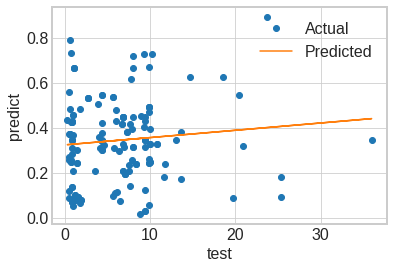

In [ ]:
# Linear Regression using Year as the reponse variable
# your code here
x=df.Year
y=df.perc
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75 , random_state=109)

model1 = LinearRegression()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

MSE = mean_squared_error(y_test , y_pred)

plt.plot(X_test , y_test ,'o', label= 'Actual')
plt.plot(X_test , y_pred , label= 'Predicted')
plt.xlabel("test")
plt.ylabel("predict")
plt.legend()
print(MSE) 

0.03246722789132968


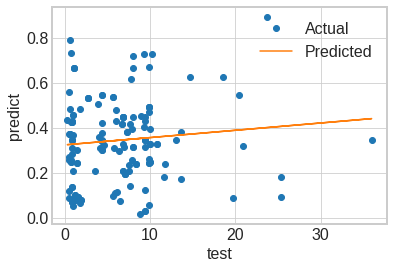

In [ ]:
# Linear Regression using MRP as the reponse variable
# your code here

x=df.MRP
y=df.perc
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75 , random_state=109)

model1 = LinearRegression()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

MSE = mean_squared_error(y_test , y_pred)

plt.plot(X_test , y_test ,'o', label= 'Actual')
plt.plot(X_test , y_pred , label= 'Predicted')
plt.xlabel("test")
plt.ylabel("predict")
plt.legend()
print(MSE) 

0.03246722789132968


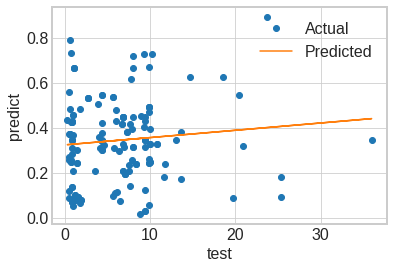

In [ ]:
# Linear Regression using KMs Driven as the reponse variable
# your code here
# Linear Regression using MRP as the reponse variable
# your code here

x=df.Kms_Driven
y=df.perc
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75 , random_state=109)

model1 = LinearRegression()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

MSE = mean_squared_error(y_test , y_pred)

plt.plot(X_test , y_test ,'o', label= 'Actual')
plt.plot(X_test , y_pred , label= 'Predicted')
plt.xlabel("test")
plt.ylabel("predict")
plt.legend( )
print(MSE) 

**Your answer here**


### 4.5

**Your answer here**


<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<h2 style="color:black;background-color:#F6E6E2"> Part Β :  Multi-Linear Regression</h2><br />


### Problem Description: 

Analysis of publically available profiles on **simplymarry** to learn more about the biases, income disparity & other interesting trends in India. 

#### Dataset

The dataset was aggregated from the **simplymarry** site.

All the attributes refer to traits and preferences of the person looking for a spouse. 

- **age** - Age of person looking for a spouse
- **gender** - Female:0, Male:1 
- **height** - Height in inches
- **bmi** - BMI calculated based on height and weight
- **eating** - {'Doesn't Matter':0, 'Jain': 1, 'Vegetarian': 2, 'Vegetarian With Eggs': 3, 'Non Vegetarian': 4}
- **family_type** - ('Doesn't Matter': 0, 'Others':3, 'Nuclear': 1, 'Joint family both parents': 2, 'Joint family only mother':2, 'Joint family father mother and brothers sisters':2, 'Joint family single parent brothers and or sisters':2, 'Joint family only father': 2)
- **status** - If social status matters to the person looking for a spouse: {'Doesn't Matter': 0, 'Middle Class': 1, 'Upper Middle Class': 2, 'High Class': 3, 'Rich / Affluent': 4}
- **manglik** - {'No': 0, 'Yes': 1, 'Do Not Know': 2} ([More on this feature](https://en.wikipedia.org/wiki/Mangala_Dosha))
- **drinking** - {'Doesn't Matter':0, 'No': 1, 'Occasionally': 2, 'Yes': 3}
- **complexion** - {'Very Fair ': 1, 'Fair ': 2, 'Wheatish Medium ': 4, 'Wheatish ':3, 'Dark':5}
- **body** - {'Slim': 1, 'Average': 2, 'Heavy': 3, 'Athletic': 4}
- **education** - {'High School':0, 'Some college':1,'Undergrad':2, 'Grad':3, 'Doctorate':4}
- **city** - ('International': 1, 'Mumbai': 2, 'Delhi':3, 'Kolkata':4,'Bengaluru':5, 'Chennai':6, 'Hyderabad':7, 'Pune':8, 'Ahmedabad':9,'Surat':10, 'Vishakapatnam':11, 'Others':12)
- **income** - {Annual income in dollars}

*source: Harvard IACS*

#### Sensitive attributes in the data

It is thought that users are mostly sincere when stating their preferences about their desired partner, and are unlikely to hide any deeply held cultural or sociological biases in order to be perceived as being politically correct. This might take care of the problem with surveys where responses touching on social norms are notorious for self-report bias.

This is a dataset designed to make you think about issues of bias and social issues in datasets. We hope that you will be able to derive insights into the above mentioned sociological biases. The data could potentially provide answers to interesting questions with associated policy ramifications, such as do these biases reduce among more educated users, or more urban users?  

In [ ]:
# Read the file named "Income_prediction.csv"

df = pd.read_csv("/content/income_prediction.csv")

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">

<b> Question 5:   Using Data science to learn more about Indian society</b>
<br />
First we are going to use simple analytics to learn more about Indian society with the help of this dataset.

The idea is to use basic modeling based on averages & sample distributions to uncover suspected biases, such as gender, skin tone & manglik status.
<br /><br />
Answer the below questions using plots & simple statistics
<br /><br />
**5.1** Is there a gender-bias for income of participants?
<br /><br />
**5.2** Is there a correlation between income and skin complexion?
<br /><br />
**5.3** Is there a discernable trend in the incomes of participants from different regions/cities?
<br /><br />
**5.4** Is there a clear trend between BMI and the income?
<br /><br />
**5.5** Does the level of education show a clear trend with income?
<br /><br />
**5.6** Do any of the numeric attributes show a clear non-linear dependence with the amount of income?
<br /><br />
**5.7** Is the income lower or high for those living in 'nuclear' families?
<br /><br />
**5.8** Is being 'Manglik' negatively affect the income of participants?

### Solutions

In [ ]:
df.head(2)

,age,gender,height,kgs,bmi,eating,status,marital_status,family_type,manglik,horoscope,drinking,smoking,values,complexion,body,caste_imp,employed,living,education,income,city
0,25,1,62,50,20.161,4,1,1,2,0,1,1,1,2,2,1,1,4,1,0,2500,12
1,28,0,66,62,22.062,2,2,1,2,2,1,1,1,2,2,2,1,4,1,2,7500,8


### 5.1

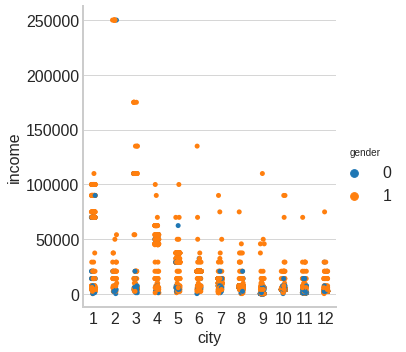

In [ ]:
# your code here Is there a gender-bias for income of participants?
import seaborn as sb
sb.catplot(x="city",y="income",hue="gender",data=df)

####so with visualization of data it is easly to say income is baised toward male.
As in every city males are dominent in income. 

### 5.2

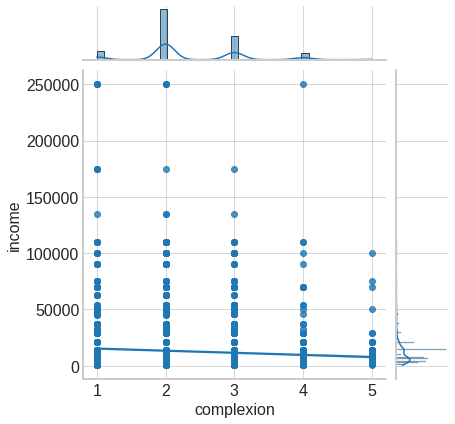

In [ ]:
# you code here  5.2 Is there a correlation between income and skin complexion?
# sb.catplot(x="city",y="income",hue="gender",data=df)
sns.jointplot(x="complexion",y="income",data=df,kind="reg")



##complexion - {'Very Fair ': 1, 'Fair ': 2, 'Wheatish Medium ': 4, 'Wheatish ':3, 'Dark':5}
####Income is decreasing as skin Complexion is decreasing. so there is positive corelation b/w these two.

### 5.3

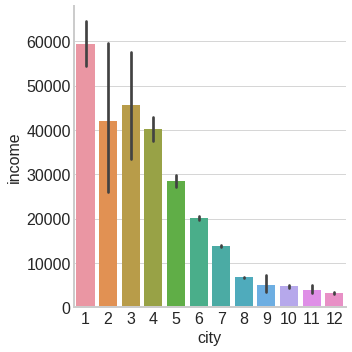

In [ ]:
# your code he
sb.catplot(x="city",y="income",data=df,kind="bar")


#####city - ('International': 1, 'Mumbai': 2, 'Delhi':3, 'Kolkata':4,'Bengaluru':5, 'Chennai':6, 'Hyderabad':7, 'Pune':8, 'Ahmedabad':9,'Surat':10, 'Vishakapatnam':11, 'Others':12)
###its look like income is gradiually decreasing down as we move away from main cities. 

### 5.4

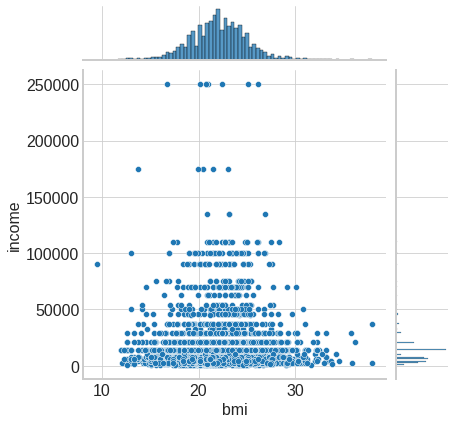

In [ ]:
# your code here
sns.jointplot(x="bmi",y="income",data=df,kind="scatter")



yes there is clear trend ,BMI b/w 12 to30 have more income. Between 20 t0 30 it is at peek.



### 5.5

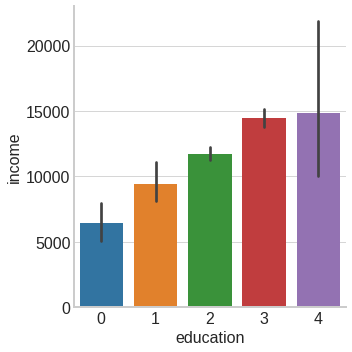

In [ ]:
# your code here
sns.catplot(x="education",y="income",data=df,kind="bar")


education - {'High School':0, 'Some college':1,'Undergrad':2, 'Grad':3, 'Doctorate':4}
###Income is really affeted by education level. positive corelation exist b/w education and income.

### 5.6

### 5.7

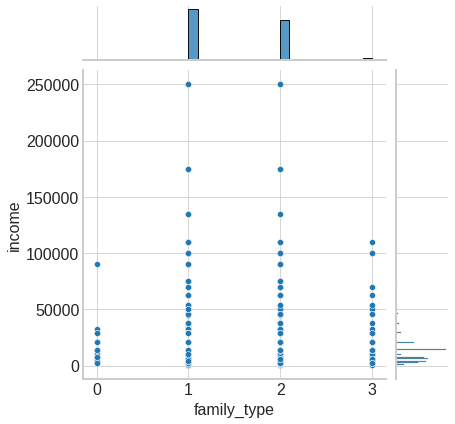

In [ ]:
# your code here
sns.jointplot(x="family_type",y="income",data=df,kind="scatter")


 Nuclear Family has higher incomes. 

### 5.8

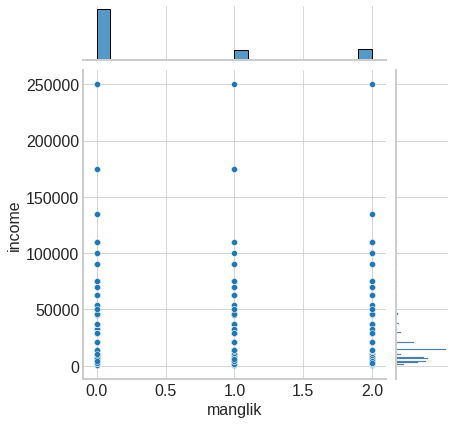

In [ ]:
# your code here
sns.jointplot(x="manglik",y="income",data=df,kind="scatter")


###No its not really affecting income. because it is equally affecting at all.

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<b> Question 6:  Calculate the Gini Index  [10 points total]</b>


Gini coefficients are often used to quantify income inequality, read more [here](http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm).

The Gini coefficient is defined by the formula:

$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini Index of 0 implies perfect income equality, whereas a gini index close to 1 implies a concentration of wealth among the richest few.
<br /><br />
**6.1** Based on the above formula, calculate the Gini coffient for the income of the participants of this dataset
<br /><br />
**6.2** Compare your gini index with other countries

According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the gini index of South Africa is 0.6 while that of Ukrain is 0.25. 

Based on your calculated gini index value for this dataset, what is your conclusion on the income disparity in the three countries?

### Solutions

### 6.1

In [ ]:
# your code here
income=df['income']
income=sorted(income)
print(income)

[417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 125

In [ ]:
income = np.array(income)
G=0
n=len(income)
sum=income.sum()
i=0
while i < (len(income)):
  x=income[i]
  G += ((2*i - n -1)*x)
  i+=1
G = G/(n*sum)
print(G)

0.4941561348985677


### 6.2

<BarContainer object of 3 artists>

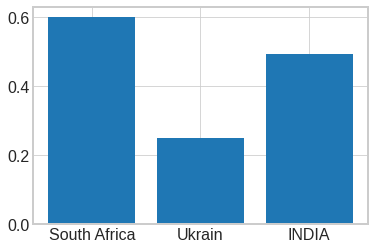

In [ ]:
# your code here
import matplotlib.pyplot as plt
x=["South Africa","Ukrain","INDIA"]
y=[0.6,0.25,G]
plt.bar(x,y)

In India It is better than Ukrain and inferrior than SouthAfrica.